# Promt development
In this python notebook the promt to detect genetic fallacies is being developed and refined using rens wilderoom framework of promt development for social science development. ( https://docs.google.com/document/d/17GMIdOGSOFJAkbbqWiBqJpNTO2NdjJAUCBRZHJUDs3o/edit?usp=sharing)

## Defining genetic fallacies
Genetic fallacies occur in political speech when arguments or ideas are **accepted** or **dismissed** soley based on their origin rather then content. (https://www.perplexity.ai/search/what-are-genetic-fallacies-in-B1c5Gqr5TyCSCsSpNfM70g)

There are many subcategories including ad hominem, appeal to false authority etc.(https://finmasters.com/genetic-fallacy/)

## Potential challanges 
- context dependency: fallacies might be not just reuslt from the use of language but context dependent. An llm might have inconsistend performance to make sense of the context across different subjects.
- Language: As our data is in dutch, we might face the issue that most opensource llm's are not primarily build to handle langues like dutch.

## Promt

In [ ]:
promt = """ You are an expert in analyzing political texts. Analyze the text below for genetic fallacies.

VERY IMPORTANT - OUTPUT RULES:
- Return EXACTLY ONE JSON object.
- NO additional text before or after the JSON.
- NO code markers (```)
- NO repetition of the same analysis.
- NO explanations outside the JSON.

CONTENT RULES:
- Report ONLY the clearest cases (confidence ≥ 0.7).
- DO NOT report weak or questionable cases.
- Focus on UNIQUE cases (not the same statement multiple times).
- Maximum of 5 cases per analysis. 

Definitions of genetic fallacies:
The genetic fallacy is a fallacy of irrelevance in which arguments or information are dismissed or validated based solely on their source of origin rather than their content.In other words, a claim is ignored or given credibility based on its source rather than the claim itself.

Examples of genetic fallacies: 
  - "MISSING"    
  - "MISSING"   


What is NOT a genetic fallacy:
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"    
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"   
  

Confidence Score Guidelines:
- 0.9 - 1.0: Unmistakable delegitimization with clear evidence.  
- 0.7 - 0.9: Clear delegitimization with good context.  
- <0.7: DO NOT REPORT.  

Return the following JSON format:
{{
  "found_fallacy": [
    {{
      "quote": "string (exact quote)",
      "explanation": "string (short justification)",
      "confidence": "float (only ≥ 0.7)",
      "context": "string (relevant context)"
    }}
  ],
  "summary": {{
    "count": "integer",
    "average_confidence": "float",
    "highest_confidence": "float",
    "lowest_confidence": "float"
  }}
}}

If no genetic fallacies with high confidence are found:
{{
  "found_fallacy": [],
  "summary": {{
    "count": 0,
    "average_confidence": 0.0,
    "highest_confidence": 0.0,
    "lowest_confidence": 0.0
  }}
}}

Text to be analyzed:
  {text} """

## Evaluation data set
Source for the 
https://helpfulprofessor.com/genetic-fallacy-examples/

In [2]:
import pandas as pd

fallacy_data = [
    {
        "category": "Appeal to False Authority",
        "text": "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it relies on a celebrity endorsement, which is irrelevant to the diet's effectiveness."
    },
    {
        "category": "Appeal to False Authority",
        "text": "This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by basing the claim on relevant expertise and scientific testing."
    },
    {
        "category": "Stereotyping",
        "text": "All pit bulls are dangerous because I heard about some pit bull attacks on the news.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it generalizes an entire breed based on limited information."
    },
    {
        "category": "Stereotyping",
        "text": "Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog's behavior.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging reported incidents but also considering other factors influencing dog behavior."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I won't consider this young candidate's policy proposals because they're too inexperienced to understand complex political issues.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses ideas based on the person's age rather than the content of their proposals."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I'll evaluate this young candidate's policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate's age.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by focusing on the content of the proposals rather than the candidate's age."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices can't be trusted because it was written by a former employee.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses information solely based on its source without considering the content."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging the source's potential insights while advocating for additional verification."
    },
    {
        "category": "Appeal to Tradition",
        "text": "We've always done our accounting this way, so there's no need to switch to new software systems.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes superiority based on longevity of use rather than effectiveness."
    },
    {
        "category": "Appeal to Tradition",
        "text": "Let's compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by proposing an objective comparison of methods based on current effectiveness."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, so she must be an excellent cook.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes skill based on nationality without any evidence."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging cultural context without making assumptions about individual abilities."
    }
]

fallacy_df = pd.DataFrame(fallacy_data)


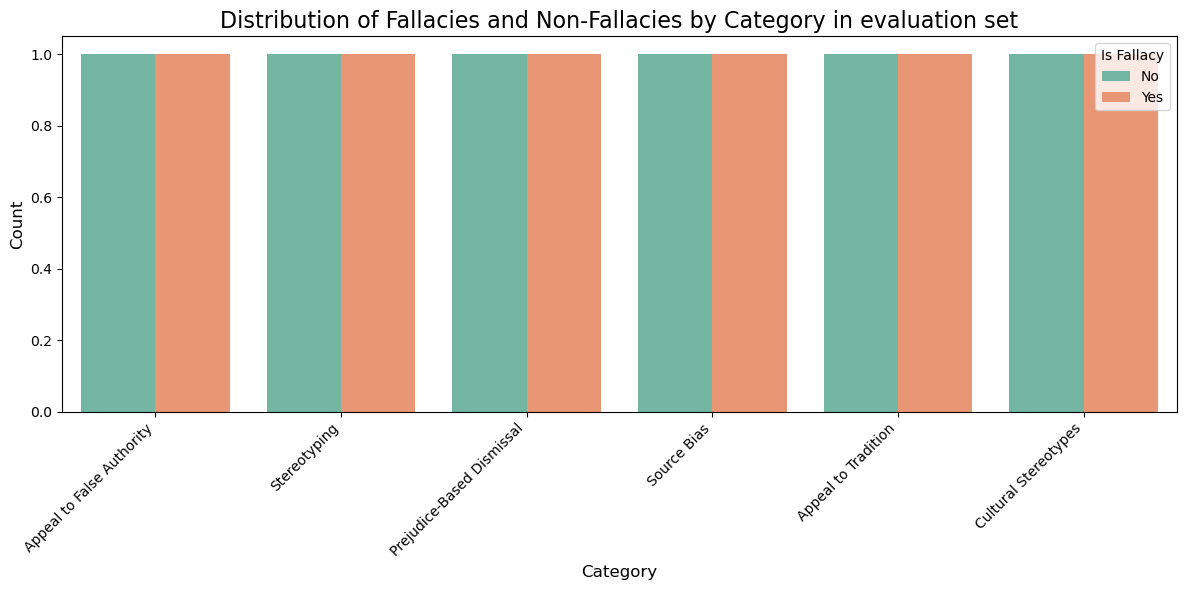

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already created the fallacy_df as in the previous example
df = fallacy_df
df['is_fallacy'] = df['is_fallacy'].astype(int)

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='is_fallacy', palette="Set2")

# Customize the plot
plt.title('Distribution of Fallacies and Non-Fallacies by Category in evaluation set', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fallacy', labels=['No', 'Yes'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# LLM test

In [ ]:
from ollama import chat

model = "deepseek"

for i in range (len(fallacy_df)):
    text = fallacy_df["text"][i]
    messages = [
            {
                "role": "user",
                "content": promt.format(text)
            }
        ]

    response = chat(model, messages = messages)
    fallacy_df["result"] = response['message']['content']
